<a href="https://colab.research.google.com/github/cicbeast/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Raul_Harrington_Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
# Let's do our imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns; sns.set()

%matplotlib inline

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

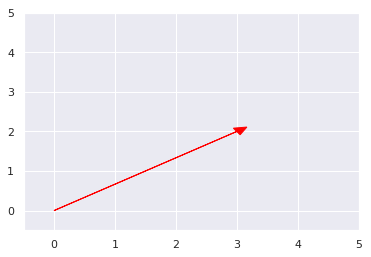

In [81]:
# Ok, let's lay out the vector
a = [3,2] 

# Now we plot
plt.xlim(-.5, 5)
plt.ylim(-.5, 5)
plt.arrow(0, 0, a[0], a[1], head_width=.2, head_length=.2, color='red')

plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [82]:
# Let's lay out the vector
b = [17, -4, -2, 1]

# Now let's find the norm
norm_b = np.linalg.norm(b)

print('The Magnitude, or Length, of vector b is:', norm_b)


The Magnitude, or Length, of vector b is: 17.60681686165901


## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [83]:
# Let's lay out the vectors
c = [3, 7, -2, 12]
d = [9, -7, 4, 6]

# Now let's find the dot product
cdotd = np.dot(c,d)

if cdotd==0:
  print('These vectors ARE Orthogonal because their dot product is: ', cdotd)
else:
  print('These vectors are NOT orthogonal because their dot product is:', cdotd,
        ', which is NOT ZERO')


These vectors are NOT orthogonal because their dot product is: 42 , which is NOT ZERO


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [84]:
# Let's lay out our matrix
E = np.array([[7, 4, 2], [1, 3, -1], [2, 6, -4]])

# Now let's find the Inverse and Transpose
inv_E = np.linalg.inv(E)
tran_E = E.T

print(inv_E,' = E^-1')
print(E.T,' = E^T')

[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]  = E^-1
[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]  = E^T


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [85]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [86]:
# Just for the info
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


In [87]:
# Let's find the values we need
cust_mean = np.mean(customers)
cust_std = np.std(customers,ddof=1)
cust_var = np.var(customers,ddof=1)

snow_mean = np.mean(snow)
snow_std = np.std(snow,ddof=1)
snow_var = np.var(snow,ddof=1)

print('Customers: Mean,', cust_mean,' Std Dev,', cust_std,' Variance,', cust_var)
print('Snow: Mean,', snow_mean,' Std Dev,', snow_std,' Variance,', snow_var)

Customers: Mean, 1135.7142857142858  Std Dev, 314.26406851866597  Variance, 98761.90476190478
Snow: Mean, 2.7142857142857144  Std Dev, 2.9277002188455996  Variance, 8.571428571428571


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [0]:
# No, they are not comparable. The variance of Customers is over 1M% greater
# This is because the domain of Customers is over 200 times the domain of snow
# The difference in spread is massive

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [89]:
# Let's get the variance-covariance matrix
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [90]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [91]:
df.dtypes

Country               object
Cheese                 int64
Carcass_Meat           int64
Other_Meat             int64
Fish                   int64
Fats_and_Oils          int64
Sugars                 int64
Fresh_Potatoes         int64
Fresh_Veg              int64
Other_Veg              int64
Processed_Potatoes     int64
Processed_Veg          int64
Fresh_Fruit            int64
Cereals                int64
Beverages              int64
Soft_Drinks            int64
Alcoholic Drinks       int64
Confectionery          int64
dtype: object

In [92]:
# We need a few more imports here
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 

# Now let's work to standardize our data
dfnum = df.drop(['Country'], axis=1)
dfnum.describe()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
count,4.000000,4.00,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,94.250000,245.25,706.000000,130.500000,205.250000,154.25000,798.250000,208.000000,457.750000,202.000000,349.000000,967.500000,1502.500000,57.500000,1427.000000,360.750000,55.250000
std,18.856917,16.50,93.427334,29.557853,22.366269,15.47848,200.755863,60.188592,92.471167,13.735599,15.769168,210.612599,54.659552,11.120552,140.612944,156.712848,10.436315
min,66.000000,227.00,586.000000,93.000000,184.000000,139.00000,566.000000,143.000000,355.000000,187.000000,334.000000,674.000000,1462.000000,47.000000,1256.000000,135.000000,41.000000
25%,93.750000,238.25,660.250000,114.750000,190.750000,145.00000,681.500000,164.000000,402.250000,195.250000,336.250000,886.250000,1469.500000,51.500000,1344.500000,315.000000,50.750000
50%,103.000000,243.50,717.500000,134.500000,201.000000,151.50000,797.000000,212.000000,453.000000,200.500000,348.500000,1029.500000,1483.000000,55.000000,1440.000000,416.500000,58.000000
75%,103.500000,250.50,763.250000,150.250000,215.500000,160.75000,913.750000,256.000000,508.500000,207.250000,361.250000,1110.750000,1516.000000,61.000000,1522.500000,462.250000,62.500000
max,105.000000,267.00,803.000000,160.000000,235.000000,175.00000,1033.000000,265.000000,570.000000,220.000000,365.000000,1137.000000,1582.000000,73.000000,1572.000000,475.000000,64.000000


In [93]:
# We'll use StandardScaler from sklearn
dfstd = StandardScaler().fit_transform(dfnum)
dfstd = pd.DataFrame(dfstd, index=dfnum.index, columns=dfnum.columns)
dfstd.describe()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
count,4.000000,4.000000,4.000000,4.000000,4.000000e+00,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000e+00
mean,0.000000,0.000000,0.000000,0.000000,6.938894e-18,-5.551115e-17,0.000000,5.551115e-17,0.000000,0.000000,-5.551115e-17,0.000000,6.938894e-18,-5.551115e-17,-2.775558e-17,0.000000,5.551115e-17
std,1.154701,1.154701,1.154701,1.154701,1.154701e+00,1.154701e+00,1.154701,1.154701e+00,1.154701,1.154701,1.154701e+00,1.154701,1.154701e+00,1.154701e+00,1.154701e+00,1.154701,1.154701e+00
min,-1.729885,-1.277169,-1.483121,-1.464967,-1.097071e+00,-1.137656e+00,-1.335847,-1.247006e+00,-1.283054,-1.260994,-1.098378e+00,-1.609137,-8.555755e-01,-1.090266e+00,-1.404236e+00,-1.663384,-1.576656e+00
25%,-0.030617,-0.489873,-0.565440,-0.615286,-7.485897e-01,-6.900536e-01,-0.671519,-8.441271e-01,-0.693036,-0.567447,-9.336213e-01,-0.445460,-6.971356e-01,-6.230090e-01,-6.774824e-01,-0.337098,-4.978915e-01
50%,0.535805,-0.122468,0.142132,0.156263,-2.194142e-01,-2.051511e-01,-0.007190,7.673883e-02,-0.059314,-0.126099,-3.661260e-02,0.339920,-4.119437e-01,-2.595871e-01,1.067548e-01,0.410780,3.042670e-01
75%,0.566422,0.367405,0.707572,0.771549,5.291754e-01,4.849025e-01,0.664329,9.208660e-01,0.633722,0.441348,8.970087e-01,0.785380,2.851918e-01,3.634219e-01,7.842372e-01,0.747878,8.021585e-01
max,0.658275,1.522105,1.198856,1.152440,1.535899e+00,1.547958e+00,1.350227,1.093528e+00,1.401682,1.513193,1.171603e+00,0.929297,1.679463e+00,1.609440e+00,1.190727e+00,0.841823,9.681224e-01


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [94]:
# Now let's do the PCA
# We want two Principal Componenets
pca = PCA(2)
P = pca.fit_transform(dfstd)

dfP = pd.DataFrame(data=P, columns=['PC1', 'PC2'])
dfP.head()


,PC1,PC2
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


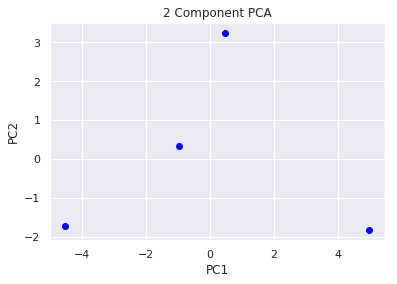

In [95]:
# Now we need to graph
x = dfP['PC1']
y = dfP['PC2']
plt.title('2 Component PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(x,y, c='blue')
plt.show()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [96]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [97]:
points.shape

(200, 2)

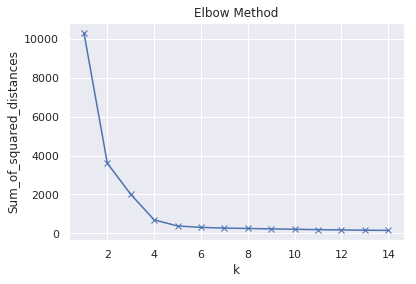

In [98]:
# Let's import again
from sklearn.cluster import KMeans

# And let's find out how many clusters we'll need
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

In [99]:
# Elbow is at 4, so we use 4 Clusters
# Now let's get to Kmeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(points)
y_kmeans = kmeans.predict(points)
labels = kmeans.labels_

print(labels)

[0 3 3 0 3 3 0 0 1 3 3 3 3 3 0 3 0 3 3 2 0 2 2 2 3 3 3 1 3 3 3 3 3 2 3 3 3
 3 1 3 3 2 1 1 1 3 3 3 0 3 2 0 0 1 2 3 3 1 1 0 2 3 0 1 2 1 2 1 0 1 3 3 3 3
 2 2 3 3 1 2 1 3 3 3 1 3 1 3 3 2 1 3 2 3 3 3 3 3 3 3 3 3 0 3 3 2 0 0 0 2 3
 2 3 0 3 3 1 1 2 1 2 3 3 0 3 0 3 2 1 0 3 0 3 0 1 1 3 2 0 3 1 3 3 2 3 1 3 1
 0 3 3 3 0 2 3 1 3 2 3 0 3 3 1 0 2 2 3 1 3 3 0 3 1 2 3 3 3 3 3 0 3 3 3 3 3
 3 0 2 1 3 3 0 2 0 3 1 2 2 3 3]


In [100]:
# Now let's add the cluster labels to our dataframe
labels_series = pd.Series(labels)
points['clusters'] = labels_series.values

points.head()

,x,y,clusters
0,-7.846803,-3.421277,0
1,-3.554323,-6.884729,3
2,-0.192822,-9.671030,3
3,-6.401456,-5.223972,0
4,-0.804026,-9.704457,3


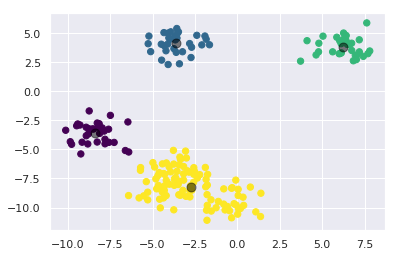

In [101]:
# Now we can visualize our clusters

# First our clusters
plt.scatter(points['x'],points['y'], c=y_kmeans, s=40, cmap='viridis')

# Then we find the cluster centers
centers = kmeans.cluster_centers_

# Now we plot them
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=80, alpha=0.5);
